# Teorema de Bayes

* Elaborado: Antonio Rendon C
* Fecha: 21-Ago-2023


El teorema de Bayes es utilizado para calcular la probabilidad de un suceso, teniendo información de antemano sobre ese suceso.

Podemos calcular la probabilidad de un suceso A, sabiendo además que ese A cumple cierta característica que condiciona su probabilidad. El teorema de Bayes entiende la probabilidad de forma inversa al teorema de la probabilidad total. El teorema de la probabilidad total hace inferencia sobre un suceso B, a partir de los resultados de los sucesos A. Por su parte, Bayes calcula la probabilidad de A condicionado a B.

$$
P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}
$$

> Donde: 

>> * P(A∣B) es la probabilidad posterior de A dado B.
>> * P(B∣A) es la probabilidad de B dado A. Se le conoce como la verosimilitud.
>> * P(A) es la probabilidad a priori de A. Es nuestra creencia inicial sobre A antes de tener en cuenta la evidencia B.
>> * P(B) es la probabilidad marginal de B y actúa como un factor de normalización.


### Fuente de Datos: 
El GSS (General Social Survey) es una encuesta realizada en Estados Unidos desde 1972, diseñada para 
recopilar datos y monitorear cambios en las actitudes y comportamientos sociales de los ciudadanos. El 
dataset del GSS contiene una amplia variedad de información sobre temas sociales, desde opiniones sobre el 
aborto hasta creencias religiosas. Es una herramienta valiosa para sociólogos, investigadores y políticos para 
analizar tendencias y patrones en la sociedad estadounidense a lo largo del tiempo.


Para el propósito de este proyecto y enfocarnos solo en la aplicación del teorema de Bayes, hemos creado un 
subset con un par de variables y sin valores nulos o ausentes.

Las dos variables que elegimos para trabajar son:


>>   __satjob__: Se refiere a la satisfacción que el entrevistado dijo tener a nivel general sobre su trabajo

>>   **c_educ**: El grado máximo de estudios que el entrevistado dijo tener


El proposito sera ver la relacion entre la satisfaccion laboral y el nivel de estudios, por lo tanto podemos hacernos la pregunta:

__Dado un nivel específico de educación (c_educ), ¿cuál es la probabilidad de tener un cierto nivel de satisfacción laboral (satjob)?__



### Desarrollo:

Comencemos por hacer nuestra carga de librerias y configuracion del notebook

In [90]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Config
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncating the display of a DataFrame across columns.
pd.set_option('display.max_rows', None)  # Show all rows

* a) Cargamos nuestro dataset completo
* b) Seleccionamos solo las variables que usaremos
* c) Convertimos en categorica la variable educ
* d) Mostramos las primeras lineas de nuestro nuevo dataset

In [1]:
# a) Load the dataset 
df=pd.read_csv(r'.\gss_bayes.csv', low_memory=False)

# b) Select only the columns of interest for this activity
data = df[['satjob', 'educ']]

# Eliminar filas donde educ = 0.0
data = data[data['educ'] != 0.0]

#Remove rows with NA values and rename the subset as "data"
data = data.dropna()

#c) Convert the variable "educ" into categorical
#Define the category bins
bins = [ 0, 12, 16, 20] 

# Define the category names
labels = ['basica', 'media', 'superior']

# Create a new column c_educ
data['c_educ'] = pd.cut(data['educ'], bins=bins, labels=labels, right=True)
# Drop the column  'educ'
data = data.drop(columns=['educ'])

# d) Show the first rows in our fataframe
data.head(10)



NameError: name 'pd' is not defined

Revisemos cuantos registros tenemos para trabajar: 

In [92]:
#How many rows and columns are in our dataframe 
data.shape

(41133, 2)

Tenemos una buena cantidad de registros para trabajar, ahora veamos los valores unicos que puede tener cada  variable

In [93]:
#Show the inique values for each variable

for columna in data.columns:
    print(columna)
    print(data[columna].unique())

satjob
['A Little Dissat' 'Mod. Satisfied' 'Very Satisfied' 'Very Dissatisfied']
c_educ
['media', 'basica', 'superior']
Categories (3, object): ['basica' < 'media' < 'superior']


#### Calculo de probabilidades

Veamos cual es la frecuencia y probabilidad de cada valor 

In [94]:
#Calculate frequencies and probabilities for each variable

#Create a dictionary to store frequencies and probabilities
frequencies = {}
probabilities = {}

for column in data.columns:
    # Frecuencies
    freq = data[column].value_counts()
    frequencies[column] = freq
    
    # Probabilities
    prob = data[column].value_counts(normalize=True)
    probabilities[column] = prob

# Show frecuencies and probabilities
for column in data.columns:
    print(f"Frecuencias de {column}:\n{frequencies[column]}\n")
    print(f"Probabilidades de {column}:\n{probabilities[column]}\n")

Frecuencias de satjob:
satjob
Very Satisfied       19647
Mod. Satisfied       15679
A Little Dissat       4098
Very Dissatisfied     1709
Name: count, dtype: int64

Probabilidades de satjob:
satjob
Very Satisfied       0.477646
Mod. Satisfied       0.381178
A Little Dissat      0.099628
Very Dissatisfied    0.041548
Name: proportion, dtype: float64

Frecuencias de c_educ:
c_educ
basica      21546
media       15271
superior     4316
Name: count, dtype: int64

Probabilidades de c_educ:
c_educ
basica      0.523813
media       0.371259
superior    0.104928
Name: proportion, dtype: float64



__Podemos darnos una mejor idea de nuestros datos si los graficamos__

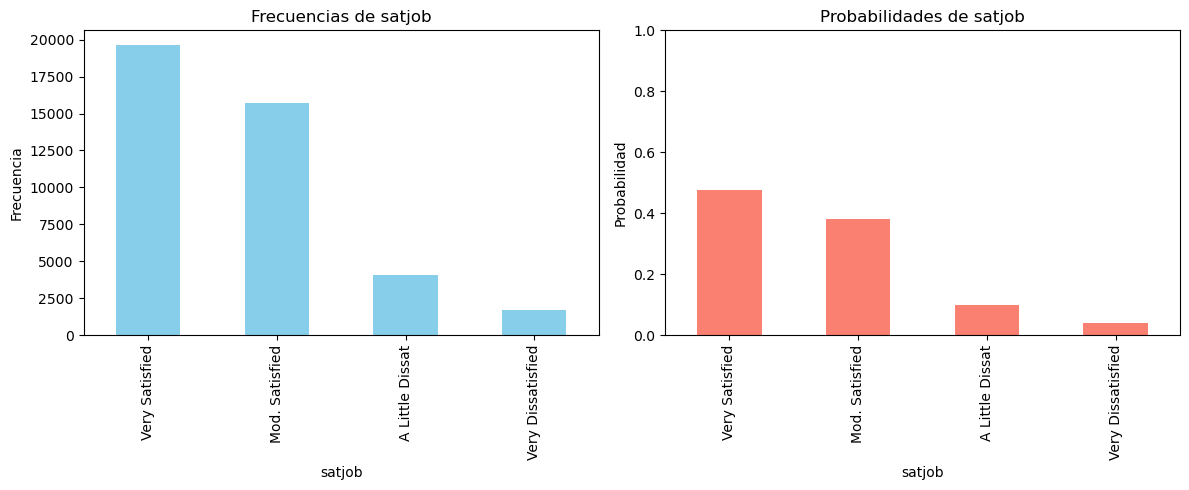

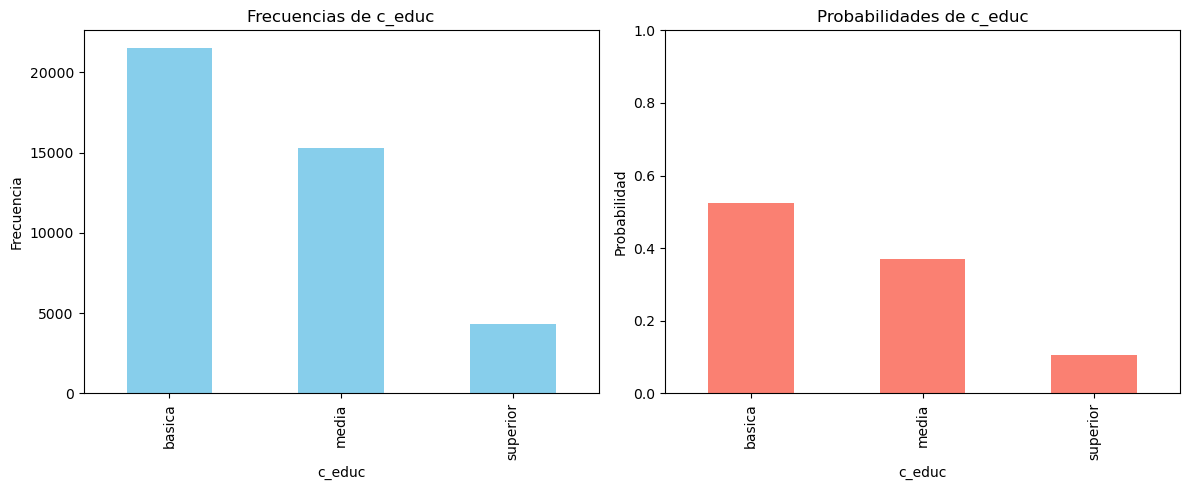

In [95]:
# Función para graficar frecuencias y probabilidades
def plot_data(column_name, frequencies, probabilities):
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(12, 5))
    
    # Gráfico de barras para frecuencias
    plt.subplot(1, 2, 1)
    frequencies[column_name].plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencias de {column_name}')
    plt.ylabel('Frecuencia')
    
    # Gráfico de barras para probabilidades
    plt.subplot(1, 2, 2)
    probabilities[column_name].plot(kind='bar', color='salmon')
    plt.title(f'Probabilidades de {column_name}')
    plt.ylabel('Probabilidad')
    plt.ylim(0, 1)  # Ajustar el eje y para que vaya de 0 a 1
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Graficar datos para cada columna
for column in data.columns:
    plot_data(column, frequencies, probabilities)


### Aplicando el Teorema de Bayes

Recordemos que la formula es:

$$
P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}
$$


Vayamos calculando paso a paso cada una de las partes de la formula:

__P(A) Es la probabilidad de el nivel de satisfaccion sin tomar en cuenta ningun otro factor__

In [96]:
# Probabilidad marginal de satjob (P(A))
prob_A = data['satjob'].value_counts(normalize=True)
print(prob_A)


satjob
Very Satisfied       0.477646
Mod. Satisfied       0.381178
A Little Dissat      0.099628
Very Dissatisfied    0.041548
Name: proportion, dtype: float64


__P(B|A) Es la probabilidad de tener un cierto grado de estudios dado un nivel de educacion:__

In [97]:
# Probabilidad condicional de c_educ dado satjob (P(B|A))
prob_B_given_A = data.groupby('c_educ')['satjob'].value_counts(normalize=True)
print(prob_B_given_A)


c_educ    satjob           
basica    Very Satisfied       0.459528
          Mod. Satisfied       0.387868
          A Little Dissat      0.106563
          Very Dissatisfied    0.046041
media     Very Satisfied       0.482483
          Mod. Satisfied       0.381638
          A Little Dissat      0.097178
          Very Dissatisfied    0.038701
superior  Very Satisfied       0.550973
          Mod. Satisfied       0.346154
          A Little Dissat      0.073679
          Very Dissatisfied    0.029194
Name: proportion, dtype: float64


__Por ultimo calculamos la probabilidad de tener un cierto grado de estudios__

In [98]:
# Probabilidad marginal de c_educ P(B)
prob_B = data['c_educ'].value_counts(normalize=True)
print(prob_B)


c_educ
basica      0.523813
media       0.371259
superior    0.104928
Name: proportion, dtype: float64


__Pongamos todo junto y lo mostramos en una tabla de probabilidades__

In [99]:

# Tus códigos originales para P(A) y P(B)
prob_A = data['satjob'].value_counts(normalize=True)
prob_B = data['c_educ'].value_counts(normalize=True)

# Calcula P(B|A)
prob_B_given_A = data.groupby('c_educ')['satjob'].value_counts(normalize=True)

# Multiplica P(B|A) por P(A)
resultados = []
for A in prob_A.index:
    for B in prob_B.index:
        if (B, A) in prob_B_given_A:
            prob_B_given_A_times_prob_A = prob_B_given_A[B, A] * prob_A[A]
            resultados.append([f"P({B}|{A})", prob_A[A], prob_B_given_A[B, A], prob_B[B], prob_B_given_A_times_prob_A])

# Convertir los resultados en un DataFrame
df_resultados = pd.DataFrame(resultados, columns=["Combinación", "P(A)", "P(B|A)", "P(B)", "P(B|A)*P(A)"])

# Imprimir el DataFrame
print(df_resultados)


                      Combinación      P(A)    P(B|A)      P(B)  P(B|A)*P(A)
0        P(basica|Very Satisfied)  0.477646  0.459528  0.523813     0.219492
1         P(media|Very Satisfied)  0.477646  0.482483  0.371259     0.230456
2      P(superior|Very Satisfied)  0.477646  0.550973  0.104928     0.263170
3        P(basica|Mod. Satisfied)  0.381178  0.387868  0.523813     0.147847
4         P(media|Mod. Satisfied)  0.381178  0.381638  0.371259     0.145472
5      P(superior|Mod. Satisfied)  0.381178  0.346154  0.104928     0.131946
6       P(basica|A Little Dissat)  0.099628  0.106563  0.523813     0.010617
7        P(media|A Little Dissat)  0.099628  0.097178  0.371259     0.009682
8     P(superior|A Little Dissat)  0.099628  0.073679  0.104928     0.007341
9     P(basica|Very Dissatisfied)  0.041548  0.046041  0.523813     0.001913
10     P(media|Very Dissatisfied)  0.041548  0.038701  0.371259     0.001608
11  P(superior|Very Dissatisfied)  0.041548  0.029194  0.104928     0.001213

__Veamos como queda graficada en un heatmap esta informacion__

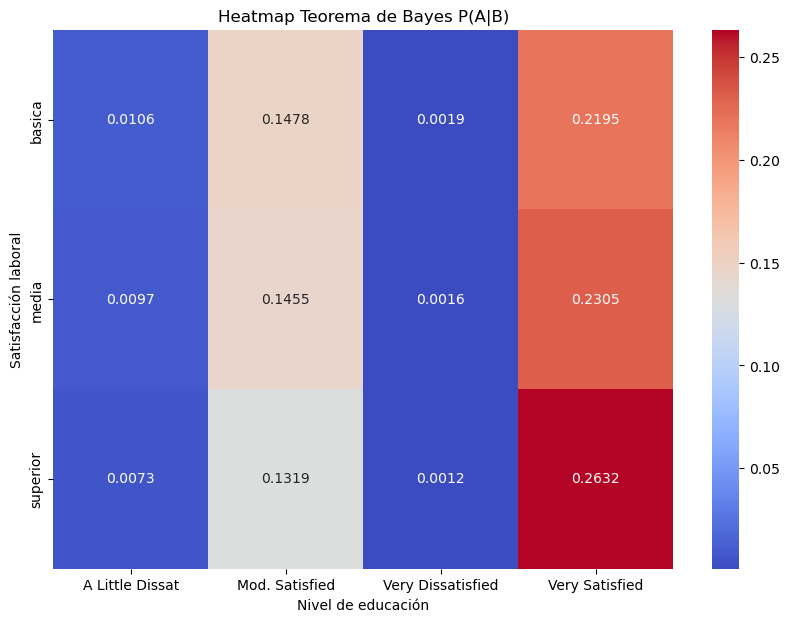

In [108]:
# Extrayendo las categorías de "Combinación"
df_resultados['c_educ'] = [combinacion.split('|')[1][:-1] for combinacion in df_resultados['Combinación']]
df_resultados['satjob'] = [combinacion.split('(')[1].split('|')[0] for combinacion in df_resultados['Combinación']]

# Crear el DataFrame pivotado usando las categorías
heatmap_data = df_resultados.pivot(index='satjob', columns='c_educ', values='P(B|A)*P(A)').fillna(0)

# Graficar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".4f")

# Agregar título y mostrar el heatmap
plt.xlabel("Nivel de educación")
plt.ylabel("Satisfacción laboral")
plt.title("Heatmap Teorema de Bayes P(A|B)")
plt.show()  

### Conclusiones: 

Durante el desarrollo de esta actividad, pudimos calcular la probabilidad condicional usando un dataset con datos reales usando el __Teorema de Bayes__, y analizando los resultados obtenidos podemos decir que: 


Es notable que las personas con educación superior tienen la mayor probabilidad de estar "Muy Satisfechas" con su trabajo.

Además, hay una tendencia decreciente en la satisfacción a medida que disminuye el nivel de educación. 

Esto podría ser un área de interés para investigaciones futuras y analizar si hay otros factores que afectan la satisfaccion laboral de las personas.

### Siguientes pasos:

Quedaria pendiente como mejoras a este cuaderno: 

* Reordenar el heatmap para una mejor comprension de las probabilidades
* Hacer alguna prueba de hipotesis para tener un argumento mas solido en nuestro planteamiento
* Investigar otras variables que puedan influir en la satisfaccion laboral

## Referencias
* Economipedia. (s.f.). Teorema de Bayes. https://economipedia.com/definiciones/teorema-de-bayes.html.
* Navarro Frómeta, A. (s.f.). Teorema de Bayes. https://navarrof.orgfree.com/Docencia/MatematicasIII/M3UT1/ut1t4.htm.
* Study Smarter. (s.f.). Teorema de Bayes. https://www.studysmarter.es/resumenes/matematicas/estadistica-y-probabilidad/teorema-de-bayes/es/

